In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error as mse

In [115]:
raw_data=pd.read_csv("C:\\Users\\GAURANG RASTOGI\\OneDrive\\Documents\\VS Code\\Python_Jupyter\\ML_AN\\Linear Dataset\\multi_linear_dataset.csv")
raw_data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1,1,1,1,1,1,2,1,4.0,3.9,4.9,380000,144400,7600000
1,2,1986,26,2,1,2,0,1,1,1,4,4.9,4.2,2.5,760122,304049,21717770
2,1,909,70,1,1,1,1,1,2,1,5,4.1,3.8,2.2,421094,92114,13159200
3,7,1855,14,3,2,0,0,3,3,2,3,4.7,3.9,3.6,356321,77042,9630290
4,4,1226,84,1,1,1,1,3,1,1,2,3.0,2.5,4.1,237000,74063,7406250


In [116]:
#normalisation of data_ x contain normalised data
data=raw_data.mean()
max_val=raw_data.max()
min_val=raw_data.min()
n_data=(raw_data-data)/(max_val-min_val) #Normalise

In [117]:
#separte the predicting attribute into Y for model training 
y = n_data['SALES_PRICE']
#separate the other attributes from the predicting attribute
l_x= n_data.drop('SALES_PRICE',axis=1)
list=[]
for i in range(1,6000):
    list.append(1)
x=l_x.assign( Bias=list)

In [118]:

sample_x=np.array(x)
sample_y=np.array(y)[np.newaxis]
print(sample_x.shape,sample_y.shape,type(sample_x),type(sample_y))

(5999, 17) (1, 5999) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


[[-2.71386325e-02  1.47213273e-01  3.95697476e-03  8.03406523e-02
   3.83338847e-02  1.80649116e-01  3.85804188e-02 -1.45485724e-01
  -8.24366396e-03  1.90485384e-02  1.31906141e-01  6.46989751e-03
   5.04659499e-05  4.69898839e-03  1.80986525e-01  1.05254978e-01
   1.77924390e-17]]


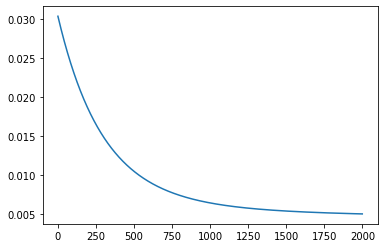

In [119]:
#Gradient Descent
#this is vectorisation,no need to do loops and all , matrix multiplication will take care
def gradientDescent(X,Y,learn_rate,iters):
    theta=np.zeros([1,X.shape[1]])
    cost=[]
    var1=[]
    for i in range(1,iters):
        l=np.dot(theta,X.T)
        m=l-Y
        cost.append(mse(l,Y))
        var1.append(i)
        p=(m*X.T).T
        z=np.zeros([1,X.shape[1]])
        for i in range(0,5999):
            z+=p[i]
        z=(z*learn_rate)/(X.shape[0])
        theta=theta-z
    plt.plot(var1,cost)
    return theta
learn_rate=0.01
iters=2000
theta=gradientDescent(sample_x,sample_y,learn_rate,iters)
print(theta)

In [120]:
import math
predicted=np.dot(theta,(sample_x.T))
# mn=raw_data.SALES_PRICE.mean()  
# max_val=raw_data.SALES_PRICE.max()
# min_val=raw_data.SALES_PRICE.min()
# a=(predicted)*(max_val-min_val)+mn
# b=(sample_y)*(max_val-min_val)+mn
# error=np.square((predicted-sample_y))
# sum_=np.sum(error)
# print(math.sqrt(sum_/sample_x.shape[0]))
print(mse(predicted,sample_y))

0.0050685950918964145
